── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

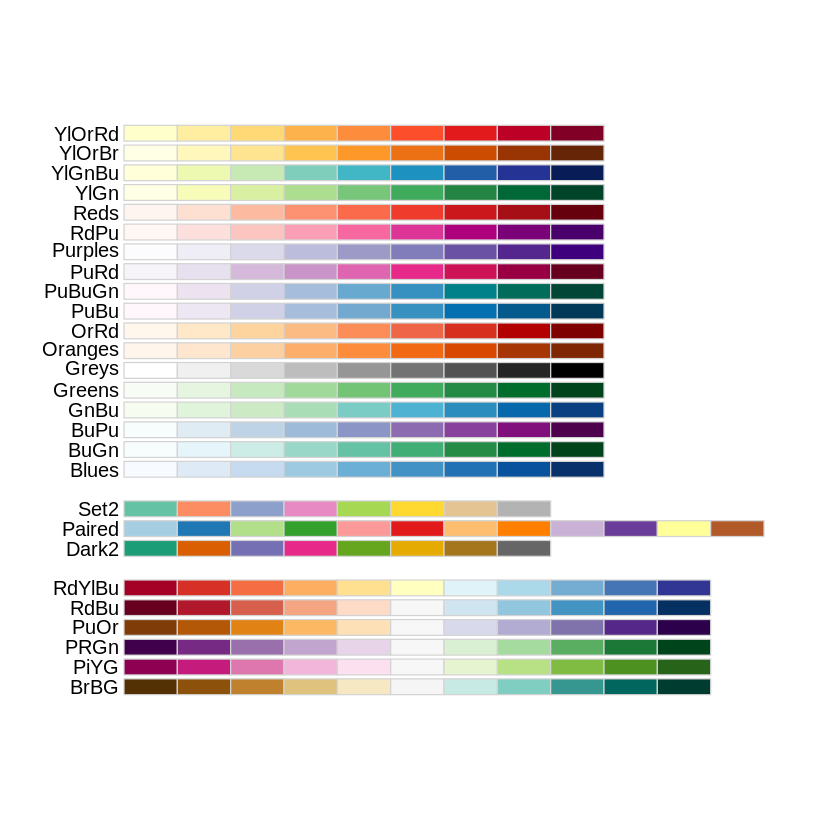

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)

OBJECTIVES:
-Demonstrate that the dataset can be read from the web into R 
-Clean and wrangle your data into a tidy format

-Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

-Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [2]:
#Imported data from the website and added column names
#The data set we are using is processed cleveland
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- read_delim(url, delim = ",", 
                         col_names=c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","predicted_attribute")) 

#1,14,4,5
head(heart_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,predicted_attribute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [21]:
#selected the columns of interest
selected_heart_data <- select(heart_data, age, trestbps, chol, predicted_attribute)|>
mutate(predicted_attribute = as.factor(predicted_attribute))
head(selected_heart_data)

age,trestbps,chol,predicted_attribute
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,0
67,160,286,2
67,120,229,1
37,130,250,0
41,130,204,0
56,120,236,0


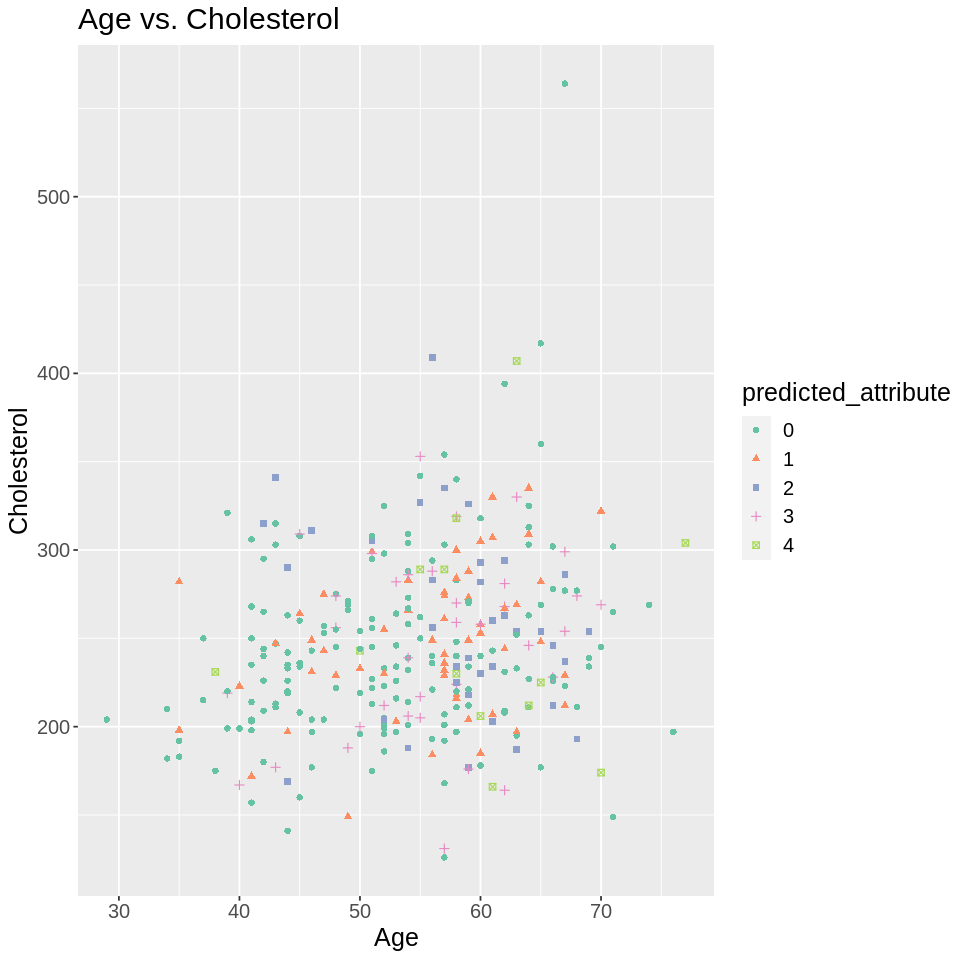

In [20]:
#A plot of Age vs Cholesterol
options(repr.plot.width = 8, repr.plot.height = 8)
Chol_polt <- selected_heart_data |>
ggplot(aes(x= age,y= chol, shape = predicted_attribute, color = predicted_attribute))+
geom_point()+
xlab("Age")+
ylab("Cholesterol")+
theme(text = element_text(size = 15))+
scale_color_brewer(palette = "Set2")+
ggtitle("Age vs. Cholesterol")

Chol_polt

In [16]:
heart_split <- initial_split(data = selected_heart_data, prop = 0.75, strata = predicted_attribute)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

head(heart_training)

age,trestbps,chol,predicted_attribute
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,0
41,130,204,0
56,120,236,0
57,140,192,0
44,120,263,0
52,172,199,0


In [17]:
heart_summarized <- heart_training |>
group_by(predicted_attribute)|>
summarize(chol = mean(chol),
         age = mean(age),
         trestbps = mean(trestbps))|>
arrange(predicted_attribute)

heart_summarized

predicted_attribute,chol,age,trestbps
<fct>,<dbl>,<dbl>,<dbl>
0,238.9106,52.48780,128.8049
1,248.0500,54.95000,132.1000
2,263.0000,57.61538,133.5000
3,240.5417,57.00000,135.3333
4,250.4167,60.08333,137.0000


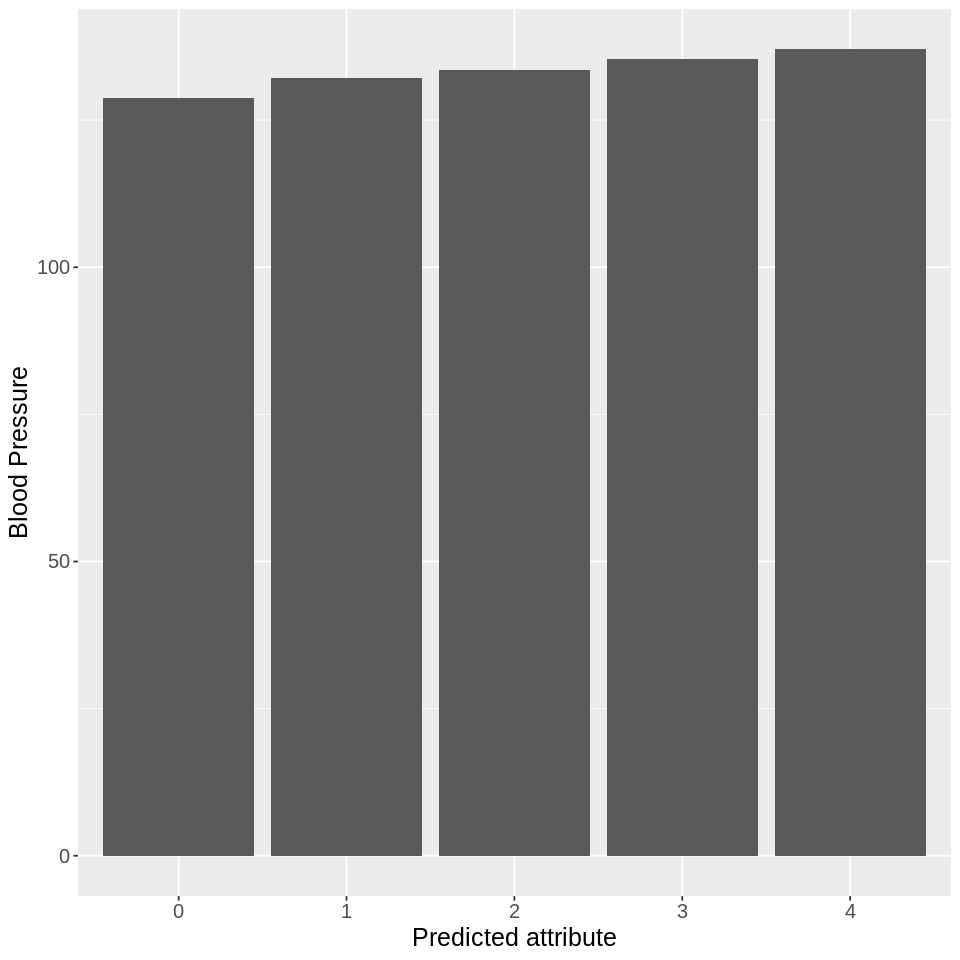

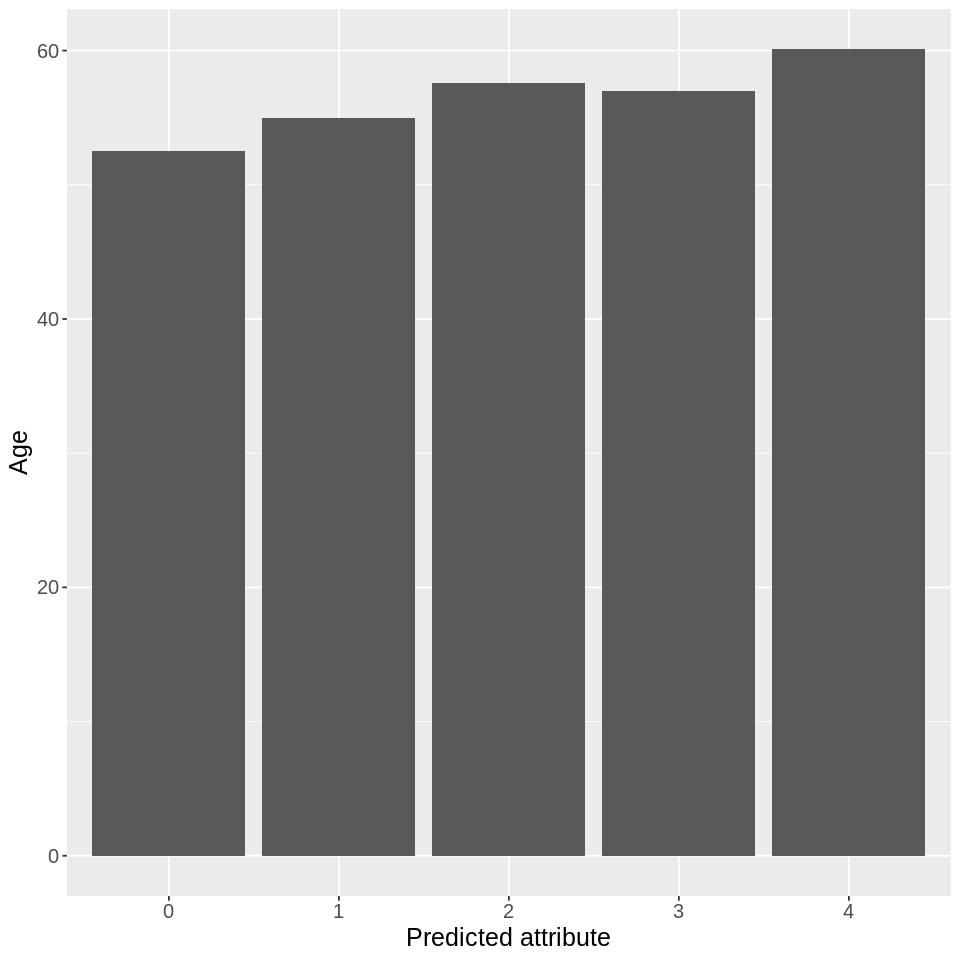

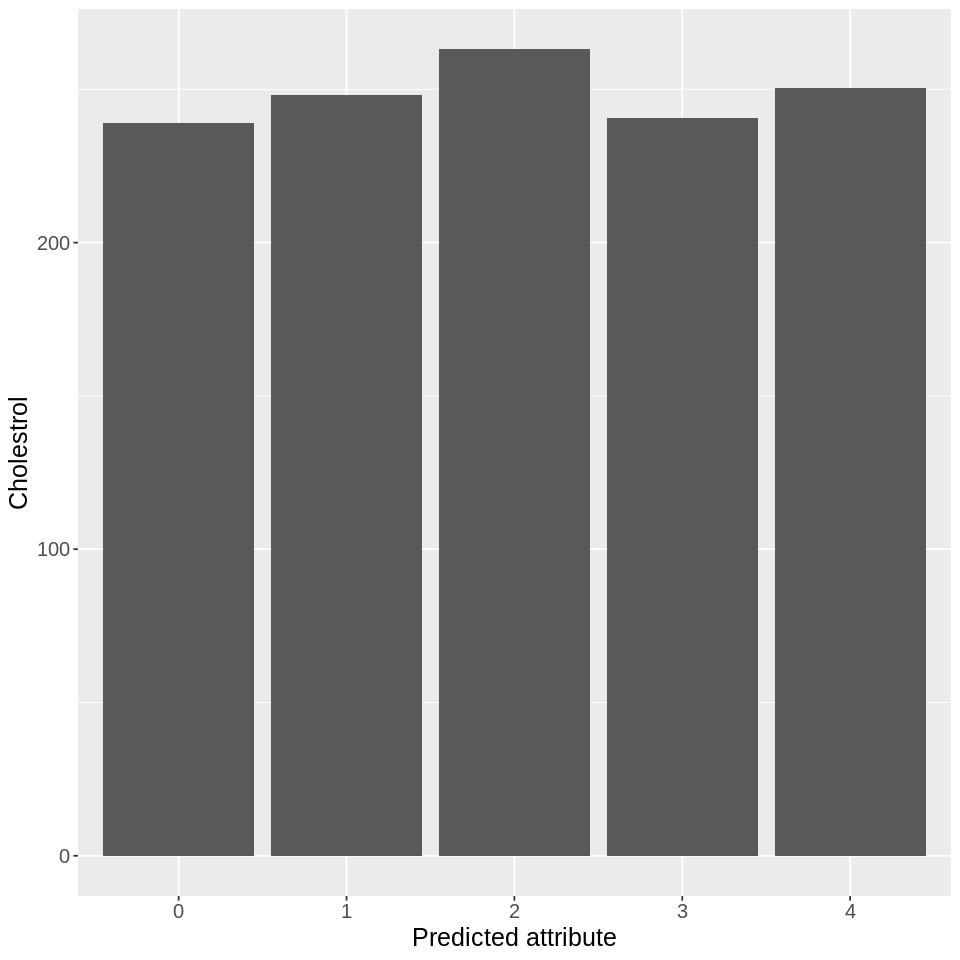

In [18]:

options(repr.plot.width = 8, repr.plot.height = 8)
heart_summarized_plot_blood_pressure <- heart_summarized |>
ggplot(aes(x= predicted_attribute, y = trestbps))+
geom_bar(stat = "identity")+
xlab("Predicted attribute")+
ylab("Blood Pressure")+
theme(text = element_text(size = 15))

heart_summarized_plot_age <- heart_summarized |>
ggplot(aes(x= predicted_attribute, y = age))+
geom_bar(stat = "identity")+
xlab("Predicted attribute")+
ylab("Age")+
theme(text = element_text(size = 15))

heart_summarized_plot_cholestrol <- heart_summarized |>
ggplot(aes(x= predicted_attribute, y = chol))+
geom_bar(stat = "identity")+
xlab("Predicted attribute")+
ylab("Cholestrol")+
theme(text = element_text(size = 15))

heart_summarized_plot_blood_pressure
heart_summarized_plot_age
heart_summarized_plot_cholestrol